# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow import keras as ks
import tensorflow as tf

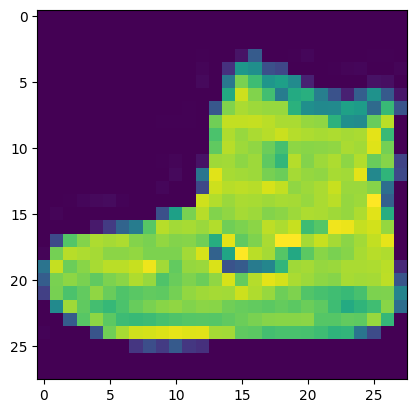

In [3]:
plt.imshow(x_train[0])

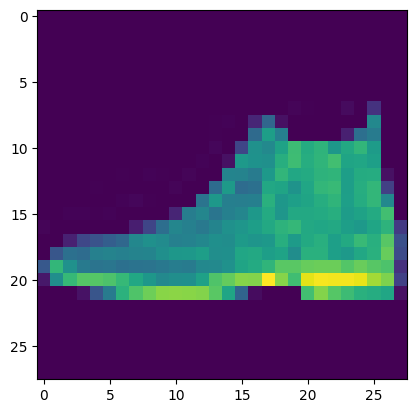

In [4]:
plt.imshow(x_test[0])

## Предобработка

**Нормализуйте данные X_train и X_test **

In [5]:
x_train_norm = x_train/255
np.max(x_train_norm)

1.0

In [6]:
x_test_norm = x_test/255
np.max(x_test_norm)

1.0

**Преобразуйте  y_train и y_test в one_hot представления **

In [7]:
y_train_hot = tf.one_hot(y_train, 10)

In [8]:
y_test_hot = tf.one_hot(y_test, 10)

In [9]:
y_test_hot

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [10]:
#ks.backend.clear_session()
model = ks.Sequential([
    ks.layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(28, 28,1)),
    ks.layers.MaxPooling2D(pool_size=(2, 2)),
    ks.layers.Flatten(input_shape=(28, 28)),
    ks.layers.Dense(128, activation=tf.nn.relu),
    ks.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [13]:
model.fit(x_train_norm, y_train_hot,batch_size=120,epochs=5)

Epoch 1/5
500/500 [==============================] - 22s 40ms/step - loss: 0.4681 - accuracy: 0.8341
Epoch 2/5
500/500 [==============================] - 19s 39ms/step - loss: 0.3107 - accuracy: 0.8881
Epoch 3/5
500/500 [==============================] - 20s 40ms/step - loss: 0.2601 - accuracy: 0.9049
Epoch 4/5
500/500 [==============================] - 21s 41ms/step - loss: 0.2250 - accuracy: 0.9182
Epoch 5/5
500/500 [==============================] - 24s 48ms/step - loss: 0.1989 - accuracy: 0.9268


In [14]:
model.fit(x_train_norm, y_train_hot,batch_size=60, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 30s 29ms/step - loss: 0.1915 - accuracy: 0.9294
Epoch 2/5
1000/1000 [==============================] - 29s 29ms/step - loss: 0.1650 - accuracy: 0.9392
Epoch 3/5
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1428 - accuracy: 0.9484
Epoch 4/5
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1219 - accuracy: 0.9555
Epoch 5/5
1000/1000 [==============================] - 34s 34ms/step - loss: 0.1051 - accuracy: 0.9615


### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [15]:
loss,accuracy=model.evaluate(x_test_norm, y_test_hot, batch_size=32)

313/313 [==============================] - 4s 9ms/step - loss: 0.3010 - accuracy: 0.9111


In [16]:
predictions = model.predict(x_test_norm)

313/313 [==============================] - 3s 9ms/step


In [17]:
predictions=np.argmax(predictions,axis=1)

In [18]:
y_test=np.argmax(y_test_hot,axis=1)

In [19]:
accuracy=ks.metrics.Accuracy()
accuracy.update_state(y_test,predictions)
accuracy=float(accuracy.result())
accuracy

0.9110999703407288

In [20]:
precision=ks.metrics.Precision()
precision.update_state(y_test,predictions)
precision=float(precision.result())
precision

0.9817498326301575

In [21]:
recall = ks.metrics.Recall()
recall.update_state(y_test, predictions)
recall=float(recall.result())
recall

0.9862222075462341

In [22]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.9839809381721468

## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

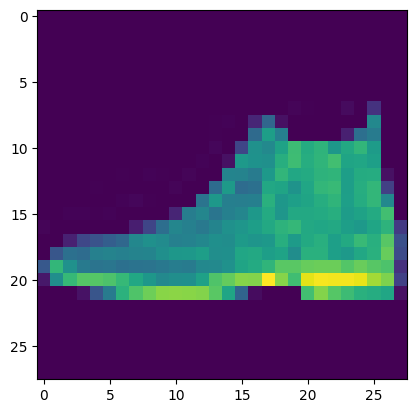

In [35]:
first_image= x_test_norm[0].reshape(28,28,1)
plt.imshow(first_image)

In [36]:
model2 = ks.Sequential(
    ks.layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(28, 28,1)))


In [37]:
filters=model2.predict(np.array([first_image]))
filters.shape

1/1 [==============================] - 0s 126ms/step


(1, 25, 25, 32)

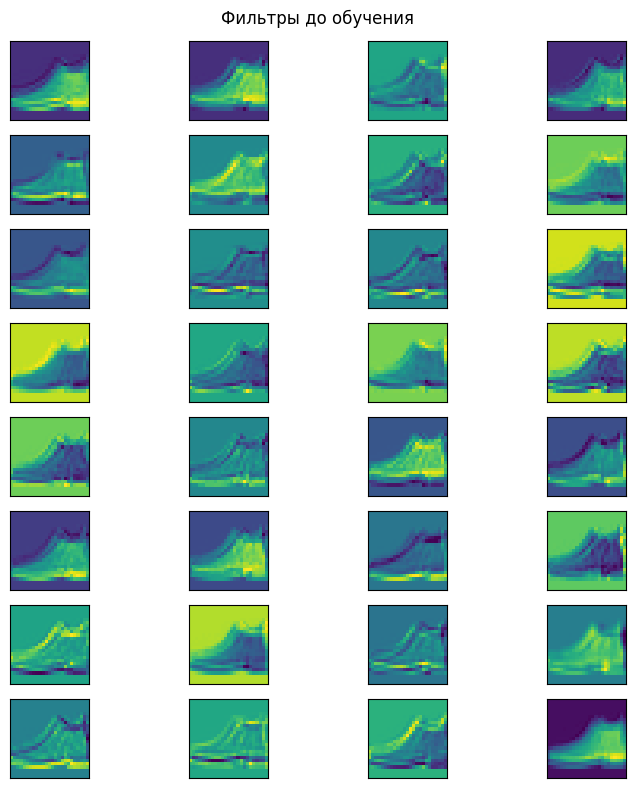

In [38]:
plt.figure(figsize=(8,8))
plt.suptitle("Фильтры до обучения")
for i in range(32):
  plt.subplot(8,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(filters[0,:,:,i])
plt.tight_layout()

In [39]:
conv2d_layer = ks.Model(inputs=model.inputs, outputs= model.layers[0].output,)
filters_after = conv2d_layer(np.array([first_image]))
filters_after.shape

TensorShape([1, 25, 25, 32])

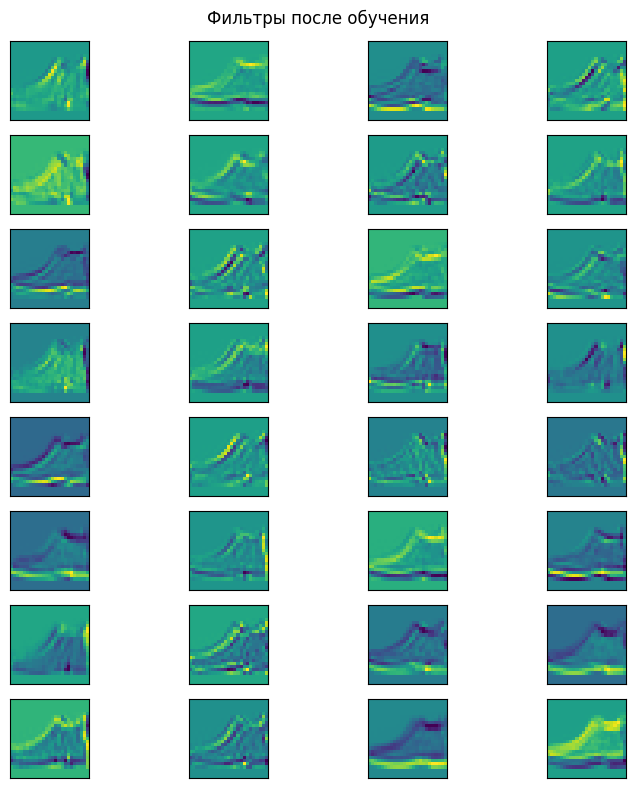

In [40]:
plt.figure(figsize=(8,8))
plt.suptitle("Фильтры после обучения")
for i in range(32):
  plt.subplot(8,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(filters_after[0,:,:,i])
plt.tight_layout()